# **Agentes integrados dentro de servidores MCP**  

Hasta ahora hemos explorado cómo los agentes pueden actuar como clientes MCP para conectarse con diferentes recursos y herramientas. Sin embargo, Pydantic AI también nos permite crear el otro extremo de la ecuación: **servidores MCP** que expongan funcionalidades de IA como herramientas reutilizables.

Esta capacidad es especialmente poderosa porque nos permite encapsular modelos de IA y su lógica asociada dentro de herramientas que pueden ser consumidas por múltiples clientes MCP. De esta manera, un servidor puede ofrecer capacidades de procesamiento de lenguaje natural, análisis de datos con IA, o cualquier otra funcionalidad basada en modelos de lenguaje como una herramienta estandardizada.

**Ventajas de usar Pydantic AI en Servidores MCP**

- **Reutilización**: Una vez implementado, el servidor puede ser utilizado por múltiples aplicaciones cliente
- **Consistencia**: La validación de datos de Pydantic garantiza interfaces robustas y predecibles
- **Escalabilidad**: Permite distribuir la carga de procesamiento de IA en servicios dedicados
- **Mantenimiento centralizado**: Los cambios en la lógica de IA se reflejan automáticamente en todos los clientes

**Implementación Práctica**

La implementación de un servidor MCP con Pydantic AI es sorprendentemente directa. El framework se encarga de la serialización, validación de datos y manejo de errores, mientras nosotros nos enfocamos en la lógica específica del modelo de IA.

A continuación veremos un ejemplo completo de cómo crear un servidor MCP que integra Pydantic AI dentro de una herramienta:

In [29]:
!cat mcp/mcp_server.py

from dotenv import load_dotenv
from mcp.server.fastmcp import FastMCP
from pydantic_ai import Agent
from datetime import datetime, timedelta
import json
import random
import logfire
from typing import List, Dict, Optional
from datetime import datetime, timedelta

load_dotenv()

# Configurar Logfire
logfire.configure(
    service_name="mcp-creative-server",
    service_version="1.0.0",
    environment="development"
)

logfire.instrument_pydantic()

server = FastMCP('Creative AI Tools Server')

# Agentes especializados
story_agent = Agent('openai:gpt-4o-mini', 
    system_prompt='''Eres un narrador interactivo experto. Creas historias envolventes donde el usuario puede tomar decisiones que afectan el rumbo de la narrativa. Siempre presenta 2-3 opciones claras al final de cada segmento.''')

debate_agent = Agent('openai:gpt-4o-mini',
    system_prompt='''Eres un debatidor experto que puede representar cualquier perspectiva de forma convincente y respetuosa. Presenta argumentos sólidos, us

Este ejemplo ilustra la potencia y versatilidad de integrar Pydantic AI con servidores MCP para crear herramientas de IA complejas e interactivas. El código crea un servidor que expone múltiples capacidades de IA especializadas como herramientas reutilizables:

### **Configuración del Servidor**
Se inicializa un servidor MCP usando `FastMCP` con el nombre 'Creative AI Tools Server', que identifica nuestro conjunto de herramientas en la red MCP. Este servidor maneja múltiples tipos de interacciones y mantiene estado entre sesiones.

### **Agentes Especializados**
El código define tres agentes de Pydantic AI, cada uno optimizado para tareas específicas:
- **Story Agent**: Configurado para narrativa interactiva con prompts que enfatizan la toma de decisiones
- **Debate Agent**: Especializado en argumentación estructurada y análisis de múltiples perspectivas  
- **Learning Agent**: Diseñado para educación personalizada con verificación de comprensión

### **Herramientas Avanzadas Expuestas**
El decorador `@server.tool()` transforma tres funciones complejas en herramientas MCP:

#### **1. Narrativa Interactiva (`interactive_story`)**
- Mantiene estado persistente de historias por usuario
- Procesa decisiones del usuario para ramificar la narrativa
- Adapta el contenido según el género seleccionado
- Retorna estructuras de datos complejas con múltiples campos

#### **2. Arena de Debates (`debate_arena`)**  
- Orquesta debates multi-ronda entre perspectivas opuestas
- Genera síntesis final analizando todos los argumentos
- Maneja lógica compleja de turnos y contexto acumulativo
- Produce análisis estructurado con múltiples componentes

#### **3. Tutor Adaptativo (`adaptive_tutor`)**
- Rastrea progreso individual del estudiante por materia
- Adapta explicaciones según el nivel de dificultad
- Mantiene historial de preguntas y tasas de éxito
- Personaliza el enfoque pedagógico basado en interacciones previas

### **Gestión de Estado Compleja**
Este servidor mantiene sesiones persistentes usando diccionarios globales (`story_sessions`, `learning_sessions`) que almacenan:
- Progreso de historias interactivas por usuario
- Historial educativo y métricas de aprendizaje
- Contexto acumulativo para experiencias personalizadas

### **Ejecución y Escalabilidad**
El servidor se ejecuta con `server.run()`, pero ahora maneja múltiples tipos de solicitudes simultáneas, cada una con su propia lógica de procesamiento y gestión de estado.

### **Flujo de Trabajo Avanzado**
Cuando un cliente MCP invoca cualquiera de estas herramientas, el servidor:
1. **Valida** parámetros y estado de sesión
2. **Selecciona** el agente especializado apropiado
3. **Construye** prompts contextuales complejos
4. **Procesa** múltiples interacciones con el modelo de IA
5. **Actualiza** el estado persistente
6. **Retorna** estructuras de datos ricas con múltiples campos

#### **Abstracción Inteligente**
Esta arquitectura oculta completamente del cliente:
- La complejidad de mantener estado entre sesiones
- La orquestación de múltiples llamadas al modelo de IA
- La lógica de personalización y adaptación
- La gestión de contexto acumulativo

Los clientes solo ven herramientas simples que reciben parámetros básicos pero proporcionan experiencias sofisticadas e interactivas. Esto permite que múltiples aplicaciones accedan a capacidades de IA avanzadas sin implementar la lógica compleja internamente, democratizando el acceso a funcionalidades de IA de nivel empresarial.

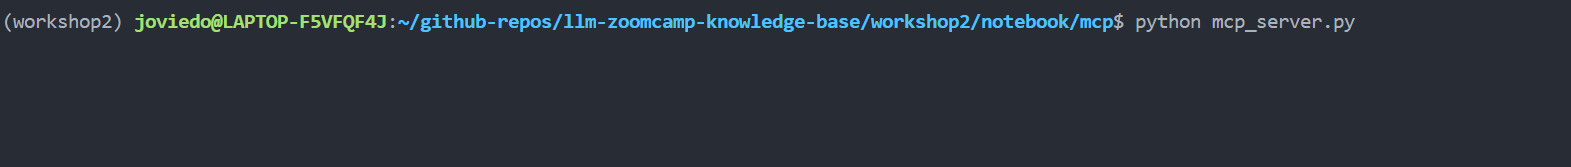

**Inicializar notebook**

Ejecuta estas celdas antes de comenzar. Incluyen funciones clave y configuración necesaria para que el resto del notebook funcione correctamente.

In [7]:
import logfire

logfire.configure()
logfire.instrument_pydantic_ai()

Logfire project URL: ]8;id=509338;https://logfire-us.pydantic.dev/j92riquelme/test-pydanticai\https://logfire-us.pydantic.dev/j92riquelme/test-pydanticai]8;;\


## Cliente de Narrativa Interactiva

Este cliente proporciona una interfaz completa para consumir la herramienta de narrativa interactiva del servidor MCP, creando una experiencia inmersiva donde las decisiones del usuario moldean activamente el desarrollo de la historia.

In [23]:
import asyncio
import os
import json
import re
from mcp import ClientSession, StdioServerParameters
from mcp.client.stdio import stdio_client

def extract_choices_from_story(story_text):
    """Extrae las opciones disponibles del texto de la historia"""
    # Busca patrones como "1)", "A)", "Opción 1:", etc.
    choice_patterns = [
        r'(\d+)\)\s*([^.]+(?:\.[^0-9].*?)?(?=\d+\)|$))',  # 1) Texto
        r'([A-Z])\)\s*([^.]+(?:\.[^A-Z].*?)?(?=[A-Z]\)|$))',  # A) Texto
        r'[Oo]pci[oó]n\s*(\d+):\s*([^\n]+)',  # Opción 1: Texto
        r'[Pp]uedes?\s*(\d+)\.?\s*([^\n]+)',  # Puedes 1. Texto
    ]
    
    choices = []
    for pattern in choice_patterns:
        matches = re.findall(pattern, story_text, re.MULTILINE | re.DOTALL)
        if matches:
            for match in matches:
                choice_id, choice_text = match
                choices.append((choice_id, choice_text.strip()))
            break  # Usar solo el primer patrón que encuentre opciones
    
    return choices

def display_choices(choices):
    """Muestra las opciones disponibles de forma clara"""
    if not choices:
        return
    
    print("\n" + "="*50)
    print("OPCIONES DISPONIBLES:")
    print("="*50)
    
    for i, (choice_id, choice_text) in enumerate(choices, 1):
        print(f"{i}. {choice_text}")
    
    print(f"{len(choices) + 1}. Escribir mi propia opción")
    print("="*50)

def get_user_choice(choices):
    """Permite al usuario elegir una opción o escribir la suya"""
    while True:
        try:
            if choices:
                choice_input = input(f"\nElige una opción (1-{len(choices) + 1}): ").strip()
                
                if choice_input.isdigit():
                    choice_num = int(choice_input)
                    
                    # Opción predefinida
                    if 1 <= choice_num <= len(choices):
                        _, selected_choice = choices[choice_num - 1]
                        print(f"Elegiste: {selected_choice}")
                        return selected_choice
                    
                    # Opción personalizada
                    elif choice_num == len(choices) + 1:
                        custom_choice = input("\nEscribe tu decisión: ").strip()
                        if custom_choice:
                            print(f"Tu decisión personalizada: {custom_choice}")
                            return custom_choice
                        else:
                            print("No puedes dejar la decisión vacía.")
                            continue
                    
                    else:
                        print(f"Número inválido. Elige entre 1 y {len(choices) + 1}")
                        continue
                
                else:
                    print("Por favor ingresa un número válido.")
                    continue
            
            else:
                # Si no hay opciones detectadas, permitir entrada libre
                choice = input("\nEscribe tu decisión: ").strip()
                if choice:
                    return choice
                else:
                    print("No puedes dejar la decisión vacía.")
                    continue
                    
        except KeyboardInterrupt:
            print("\nHistoria interrumpida!")
            return None
        except Exception as e:
            print(f"Error: {e}")
            continue

async def interactive_story_experience():
    """Experiencia completa de historia interactiva"""
    print("BIENVENIDO AL NARRADOR INTERACTIVO")
    print("="*50)
    
    # Configuración inicial
    genres = ["aventura", "misterio", "sci-fi", "fantasy", "horror"]
    print("Géneros disponibles:")
    for i, genre in enumerate(genres, 1):
        print(f"{i}. {genre.title()}")
    
    while True:
        try:
            genre_choice = input(f"\nElige un género (1-{len(genres)}): ").strip()
            if genre_choice.isdigit() and 1 <= int(genre_choice) <= len(genres):
                selected_genre = genres[int(genre_choice) - 1]
                break
            else:
                print("Opción inválida")
        except:
            print("Opción inválida")
    
    user_id = input("Ingresa tu nombre de usuario (o presiona Enter para 'jugador1'): ").strip()
    if not user_id:
        user_id = "jugador1"
    
    server_params = StdioServerParameters(
        command='python', args=['mcp/mcp_server.py'], env=os.environ
    )
    
    async with stdio_client(server_params) as (read, write):
        async with ClientSession(read, write) as session:
            await session.initialize()
            
            print(f"\nIniciando historia de {selected_genre} para {user_id}...")
            print("="*60)
            
            # Iniciar historia
            result = await session.call_tool('interactive_story', {
                'user_id': user_id,
                'action': 'start',
                'genre': selected_genre
            })
            
            story_data = json.loads(result.content[0].text)
            
            # Loop principal de la historia
            chapter_count = 0
            max_chapters = 10  # Límite para evitar historias infinitas
            
            while chapter_count < max_chapters:
                chapter_count += 1
                
                print(f"\nCAPITULO {story_data['chapter']}")
                print("-" * 40)
                print(story_data['story'])
                
                if story_data['status'] != 'awaiting_choice':
                    print("\nHistoria completada!")
                    break
                
                # Extraer y mostrar opciones
                choices = extract_choices_from_story(story_data['story'])
                display_choices(choices)
                
                # Obtener decisión del usuario
                user_decision = get_user_choice(choices)
                
                if user_decision is None:  # Usuario canceló
                    break
                
                print(f"\nProcesando tu decisión...")
                
                # Continuar historia
                try:
                    result = await session.call_tool('interactive_story', {
                        'user_id': user_id,
                        'action': 'continue',
                        'choice': user_decision
                    })
                    
                    story_data = json.loads(result.content[0].text)
                    
                except Exception as e:
                    print(f"Error al continuar la historia: {e}")
                    break
            
            if chapter_count >= max_chapters:
                print(f"\nHistoria alcanzó el límite de {max_chapters} capítulos.")
            
            print(f"\nGracias por jugar, {user_id}!")
            print("="*60)

async def quick_story_test():
    """Versión rápida para testing"""
    server_params = StdioServerParameters(
        command='python', args=['mcp/mcp_server.py'], env=os.environ
    )
    
    async with stdio_client(server_params) as (read, write):
        async with ClientSession(read, write) as session:
            await session.initialize()
            
            # Iniciar historia
            print("Iniciando historia de misterio...")
            result = await session.call_tool('interactive_story', {
                'user_id': 'test_user_1',
                'action': 'start',
                'genre': 'misterio'
            })
            
            story_data = json.loads(result.content[0].text)
            print(f"\nCapítulo {story_data['chapter']}:")
            print(story_data['story'])
            
            # Extraer opciones automáticamente
            choices = extract_choices_from_story(story_data['story'])
            display_choices(choices)
            
            # Simular elección del usuario
            if choices:
                user_choice = get_user_choice(choices)
                if user_choice:
                    print(f"\nContinuando con: {user_choice}")
                    
                    result = await session.call_tool('interactive_story', {
                        'user_id': 'test_user_1',
                        'action': 'continue',
                        'choice': user_choice
                    })
                    
                    story_data = json.loads(result.content[0].text)
                    print(f"\nCapítulo {story_data['chapter']}:")
                    print(story_data['story'])

In [24]:
await quick_story_test()

Iniciando historia de misterio...

Capítulo 1:
La noche caía sobre el pequeño pueblo de Ravenwood, envuelto en una neblina densa que parecía susurrar secretos perdidos. En una antigua mansión, heredada por su difunto abuelo, se encontraba Clara, una joven investigadora en busca de respuestas sobre la misteriosa desaparición de su familia hace años.

Mientras exploraba los oscuros pasillos, un atisbo de luz parpadeó en la biblioteca, que había permanecido cerrada durante décadas. El aroma a polvo y papel viejo llenó el aire cuando Clara empujó la puerta, revelando una habitación repleta de libros cubiertos de telarañas, y en el centro, un diario desgastado. En la primera página, una nota garabateada decía: “La verdad se oculta en la sombra de la luna”.

Justo en ese momento, un crujido resonó detrás de ella, y se dio la vuelta, sintiendo el frío aliento de lo desconocido en su nuca. Clara supo que había tomado un rumbo peligroso.

Ahora, debe decidir:

1. Leer el diario en busca de pist

In [27]:
await interactive_story_experience()

BIENVENIDO AL NARRADOR INTERACTIVO
Géneros disponibles:
1. Aventura
2. Misterio
3. Sci-Fi
4. Fantasy
5. Horror



Elige un género (1-5):  4
Ingresa tu nombre de usuario (o presiona Enter para 'jugador1'):  



Iniciando historia de fantasy para jugador1...

CAPITULO 1
----------------------------------------
En el corazón del Bosque de Eldoria, donde los árboles susurran secretos antiguos y los ríos fluyen con magia, se encuentra un pueblo escondido llamado Verentia. La paz ha reinado en esta tierra durante siglos, pero la sombra de un oscuro hechicero llamado Malathor se cierne sobre el horizonte. La leyenda dice que el antiguo Amuleto de Luz, un artefacto capaz de sellar la oscuridad, fue robado y se encuentra oculto en las profundidades de las Ruinas de Caelum, un lugar prohibido que muchos temen explorar.

Tu nombre es Elara, una aprendiz de aventurera con el cabello oscuro y ojos brillantes como las estrellas. Tu curiosidad por lo desconocido te ha llevado a este momento crucial: una decisión que podría cambiar el destino de Verentia.

Mientras las nubes se arremolinan en el cielo, sientes la llamada del peligro y la aventura. Ante ti, el camino se bifurca:

1. **Te adentras en el bosq


Escribe tu decisión:  2



Procesando tu decisión...

CAPITULO 2
----------------------------------------
Decidida a no enfrentar sola la oscuridad que acecha a Verentia, regresas al pueblo. Al llegar a la plaza central, encuentras a tus amigos: Arin, un valiente guerrero con una espada forjada en fuego ancestral, y Lira, una sabia elfa con habilidades mágicas que podrían ser la clave para tu éxito.

"¿Te has enterado de Malathor?", pregunta Arin, su rostro sombrío. “El hándicap de no tener el Amuleto de Luz puede ser nuestra perdición”. Lira asiente, sugiriendo que necesitan más información sobre las Ruinas de Caelum antes de arriesgarse.

Poco después, se acercan a una anciana que vive en los márgenes del pueblo, conocida como la Guardiana de los Secretos. “Solo quienes tienen el valor de adentrarse en la verdad pueden encontrar lo que buscan”, te dice, mirando fijamente a tus ojos.

Sabes que el tiempo corre, y la sombra de Malathor crece. 

1. **Escuchas a la Guardiana y le haces preguntas sobre las Ruinas 


Escribe tu decisión:  3



Procesando tu decisión...

CAPITULO 3
----------------------------------------
Decidido a reforzar tu grupo, te adentras en las calles de Verentia, buscando personas dispuestas a luchar contra la oscuridad. Durante tu búsqueda, te encuentras con dos figuras destacadas: Elvara, una astuta ladrona con habilidades en sigilo, y Thalos, un guerrero experimentado y conocido por su maestría con la lanza.

Elvara, con una sonrisa desafiante, acepta unirse a ti, destacando que su agilidad puede resultar invaluable en las Ruinas de Caelum. Thalos, aunque escéptico al principio, se une al grupo, convencido por tus palabras sobre la amenaza de Malathor.

Con un grupo más fuerte, regresas a la plaza donde la Guardiana de los Secretos está esperando. Ella sonría, “Con más aliados, el camino se torna más claro, pero la prueba será feroz”.

Preparados y determinados, conocen mejor que nunca la importancia de una estrategia. Al caer la noche, deciden discutir su plan.

1. **Tienen una reunión estratég


Escribe tu decisión:  3



Procesando tu decisión...

CAPITULO 4
----------------------------------------
Con determinación, te diriges a la forja, un lugar lleno de humo y el eco del martillo golpeando el metal. El herrero, un hombre robusto de barba gris, te recibe con una inclinación de cabeza. "¿Qué buscan guerreros? Me han contado sobre la oscuridad que se cierne sobre Verentia".

Elvara examina una daga reluciente mientras Thalos se interesa por una lanza forjada con un diseño intrincado. Después de un intercambio de palabras, logran obtener mejoras para su equipo: Elvara recibe una daga envenenada, y Thalos una lanza que puede atravesar casi cualquier armadura.

Sin embargo, mientras se preparan para irse, un grupo de hombres armados entra en la forja. "¡Son buscados por colaborar con la Guardiana de los Secretos!", grita el líder, levantando su espada. Sabes que una pelea es inminente.

1. **Decides enfrentarte a los hombres y defender a tu grupo.**
2. **Utilizas las sombras y el sigilo de Elvara para e


Escribe tu decisión:  2



Procesando tu decisión...

CAPITULO 5
----------------------------------------
Con un gesto decidido, le haces señas a Elvara. Ella asiente, comprendiendo que el sigilo es la clave. Ambos se deslizan detrás de un barril de metal con la esperanza de que la oscuridad disuelva su presencia. 

Mientras los hombres armados se preparan para atacar a Thalos, tú y Elvara se escabullen por una salida trasera. Al salir, el aire fresco de la noche les golpea el rostro. Pero la tranquilidad dura poco; al girar la esquina, un nuevo peligro se presenta. Un guardián de la ciudad, con un farol en mano, se interpone en su camino.

“¿Quiénes son ustedes y qué hacen en la forja a estas horas?” pregunta el guardián, su mirada sospechosa.

Elvara, aún sosteniendo su daga envenenada, te mira con inquietud. Sabes que deben actuar rápido.

1. **Declara que están huyendo de los hombres armados y piden ayuda al guardián.**
2. **Intenta convencer al guardián con una mentira elaborada sobre una entrega secreta.*


Escribe tu decisión:  1



Procesando tu decisión...

CAPITULO 6
----------------------------------------
Con un tono de urgencia, te adelantas y dices: “¡Por favor, estamos huyendo de unos hombres armados! Necesitamos su ayuda, nos quieren atrapar”. La sinceridad en tu voz roba la atención del guardián, quien baja un poco la guardia, pero su expresión sigue siendo precavida. 

“¿Hombres armados? ¿Dónde?” pregunta, mirando a su alrededor, sus ojos inquietos. En ese momento, Elvara añade: “¡No hay tiempo! Si no nos ayuda, seguramente nos encontrarán”. 

El guardián duda por un instante, pero el miedo palpable en sus ojos y el eco lejano de los gritos lo aceleran. “De acuerdo, siganme. A la derecha hay un callejón que los llevará fuera de la vista.” 

Mientras se mueven rápidamente a lo largo del callejón, el guardián da un soplo de alivio, pero tú no puedes sacudir la sensación de que algo está por suceder. Al girar la esquina, el sonido de una pelea se acerca rápidamente. 

1. **Decidir continuar hacia el calle


Escribe tu decisión:  1



Procesando tu decisión...

CAPITULO 7
----------------------------------------
Sin dudarlo, te lanzas hacia el sonido de la pelea, seguido de cerca por Elvara y el guardián. Al doblar la esquina, encuentras a tres hombres armados, con su ropa ennegrecida y signos de una vida en las sombras, atacando a un par de mercenarios que intentan defenderse. La escena es caótica y peligrosa, pero ves que uno de los mercenarios está acorralado.

“¡Ayúdanos! ¡Son parte de la banda que nos persigue!” grita el guardián, reconociendo a los atacantes. Sin pensarlo, te unes a la pelea, desenfundando tu espada. Elvara lanza un hechizo de confusión, haciendo que uno de los hombres se dé la vuelta, confuso. Con un ataque coordinado, tú y el guardián logran derribar a dos de los agresores.

Sin embargo, en ese momento, un grito desgarrador proviene de la pelea, y el mercenario herido cae al suelo, la mirada en blanco, mientras el último agresor empieza a despegarse de ti. 

1. **Concentrarte en el último a


Escribe tu decisión:  3



Procesando tu decisión...

CAPITULO 8
----------------------------------------
Sin dudarlo, decides que lo mejor es escapar, consciente de que más refuerzos de la banda podrían llegar en cualquier momento. Rápidamente, ordenas a Elvara y al guardián que te sigan mientras te alejas de la pelea. Los gritos de los mercenarios y el sonido del acero chocando se desvanecen mientras te adentras en un laberinto de callejuelas.

Al llegar a un callejón oscuro, te detienes a recuperar el aliento. “¿Por qué no ayudaste al mercenario?” pregunta Elvara, su voz llena de incertidumbre. El guardián te lanza una mirada seria. “No siempre se puede salvar a todos. Pero deberíamos encontrar un lugar seguro para planear nuestro siguiente movimiento”.

Mientras discuten, ves algo en el suelo, algo brillante. Al acercarte, descubres una pequeña llave con un símbolo extraño. Es posible que pertenezca a una puerta secreta relacionada con la banda. También puedes escuchar pasos acercándose, presagiando que no 


Escribe tu decisión:  2



Procesando tu decisión...

CAPITULO 9
----------------------------------------
Decidiendo que lo más prudente es ocultarse, te señalas a Elvara y al guardián para que te sigan en silencio. Con cuidado, atraviesan el callejón y se deslizan hacia el bullicioso mercado. El ambiente está lleno de comerciantes gritando, el aroma de especias flotando por el aire y la música de un bardo tocando en una esquina.

Sin embargo, la adrenalina sigue fluyendo por tus venas, y mientras te mezclas entre la multitud, sientes que alguien te observa. El guardián frunce el ceño, indicando que ha notado lo mismo. Entonces, de repente, un grupo de mercenarios aparece en la entrada del mercado, buscando con rostro enfurecido.

Elvara, visiblemente nerviosa, te susurra: “Debemos actuar rápido. No podemos quedarnos aquí”.

Los mercenarios comienzan a preguntar a los comerciantes sobre un grupo de fugitivos. Ahora tienes que decidir:

1. **Buscar una salida hacia una habitación trasera de una tienda cercana.**


Escribe tu decisión:  2



Procesando tu decisión...

CAPITULO 10
----------------------------------------
Con determinación, te giras hacia los mercenarios. La idea de negociar parece descabellada, pero la extraña confianza que sientes en tu voz te impulsa hacia adelante. Te acercas al grupo que parece estar al mando, un hombre de rostro marcado y mirada intensa.

“Tal vez yo pueda ayudarles”, ofreces, alzando la mano en señal de paz. El mercenario te mide de arriba abajo. “¿Y qué te hace pensar que queremos tu ayuda?” pregunta con desdén.

“Conozco la ubicación de los fugitivos”, respondes, actuando con más osadía de la que sientes. “Podría darles información valiosa, pero necesito garantías de que no nos harán daño”.

El líder de los mercenarios intercambia miradas con sus hombres. Tras unos momentos de tensión, asiente lentamente. “Habla, pero si mientes, verás lo que es realmente el infierno”.

Mientras comienzas a articular tus palabras, sientes la mirada de Elvara, ansiosa. La decisión que tomes a contin


Escribe tu decisión:  1



Procesando tu decisión...

Historia alcanzó el límite de 10 capítulos.

Gracias por jugar, jugador1!


Este código implementa un **cliente MCP avanzado** que consume la herramienta de narrativa interactiva del servidor, creando una experiencia inmersiva y bidireccional que va mucho más allá de las llamadas simples de herramientas.

## Arquitectura del Cliente MCP

A diferencia de un cliente básico que realiza una sola llamada, este cliente implementa un **patrón de sesión persistente** que mantiene múltiples interacciones con el servidor MCP, gestionando estado y contexto a través de toda la experiencia narrativa.

### **Configuración de Conexión Persistente**

```python
server_params = StdioServerParameters(
    command='python', args=['mcp/mcp_server.py'], env=os.environ
)
```

Define los parámetros de conexión que permiten al cliente lanzar y mantener comunicación continua con el servidor MCP. Esta configuración habilita una sesión extendida en lugar de conexiones puntuales, esencial para narrativas que requieren continuidad.

### **Gestión de Sesión Avanzada**

```python
async with stdio_client(server_params) as (read, write):
    async with ClientSession(read, write) as session:
        await session.initialize()
```

Establece una **sesión MCP de larga duración** usando gestores de contexto asíncronos. Esta sesión permanece activa durante toda la experiencia narrativa, permitiendo que el servidor mantenga el estado de la historia entre múltiples interacciones.

## Características Específicas del Cliente Interactivo

### **Procesamiento Inteligente de Respuestas**

```python
def extract_choices_from_story(story_text):
    choice_patterns = [
        r'(\d+)\)\s*([^.]+(?:\.[^0-9].*?)?(?=\d+\)|$))',
        r'([A-Z])\)\s*([^.]+(?:\.[^A-Z].*?)?(?=[A-Z]\)|$))',
        # ... más patrones
    ]
```

**Funcionalidad clave**: El cliente no solo recibe texto plano del servidor, sino que **analiza inteligentemente** el contenido narrativo para extraer opciones disponibles. Esto transforma una respuesta de texto en una interfaz interactiva estructurada.

### **Bucle de Interacción Continua**

```python
while chapter_count < max_chapters:
    # Mostrar contenido narrativo
    print(f"CAPÍTULO {story_data['chapter']}")
    print(story_data['story'])
    
    # Extraer y presentar opciones
    choices = extract_choices_from_story(story_data['story'])
    display_choices(choices)
    
    # Capturar decisión del usuario
    user_decision = get_user_choice(choices)
    
    # Continuar narrativa con nueva llamada MCP
    result = await session.call_tool('interactive_story', {
        'user_id': user_id,
        'action': 'continue',
        'choice': user_decision
    })
```

**Diferencia fundamental**: Mientras un cliente básico hace una llamada y termina, este cliente implementa un **ciclo de retroalimentación continuo** donde cada respuesta del servidor genera nueva entrada del usuario, creando una experiencia verdaderamente interactiva.

### **Invocación Contextual de Herramientas**

```python
# Llamada inicial
result = await session.call_tool('interactive_story', {
    'user_id': user_id,
    'action': 'start',
    'genre': selected_genre
})

# Llamadas de continuación con contexto
result = await session.call_tool('interactive_story', {
    'user_id': user_id,
    'action': 'continue',
    'choice': user_decision
})
```

**Evolución del patrón**: Las llamadas no son independientes sino **contextualmente vinculadas**. Cada invocación de herramienta incluye el identificador de usuario y la acción específica, permitiendo que el servidor mantenga coherencia narrativa a través de múltiples interacciones.

### **Gestión de Estado Distribuido**

```python
story_data = json.loads(result.content[0].text)
if story_data['status'] != 'awaiting_choice':
    print("Historia completada!")
    break
```

**Coordinación cliente-servidor**: El cliente interpreta el estado devuelto por el servidor (`awaiting_choice`, `completed`) para determinar el flujo de la aplicación. Esta **coordinación de estado distribuido** permite que la lógica narrativa resida en el servidor mientras el cliente maneja la experiencia del usuario.

## Patrones Avanzados de Cliente MCP

### **Reutilización de Sesión**

A diferencia de clientes simples que establecen conexiones únicas, este cliente **reutiliza eficientemente** la misma sesión MCP para múltiples operaciones relacionadas, reduciendo la sobrecarga de conexión y manteniendo el contexto.

### **Interfaz Adaptativa**

```python
def get_user_choice(choices):
    if choices:
        # Mostrar opciones estructuradas
        choice_input = input(f"Elige una opción (1-{len(choices) + 1}): ")
        # Lógica para opciones predefinidas o personalizadas
    else:
        # Entrada libre cuando no hay opciones detectadas
        choice = input("Escribe tu decisión: ")
```

El cliente **adapta dinámicamente** su interfaz basándose en el contenido recibido del servidor, proporcionando opciones estructuradas cuando están disponibles o entrada libre cuando es apropiado.

### **Manejo de Errores Contextual**

```python
try:
    result = await session.call_tool('interactive_story', {
        'user_id': user_id,
        'action': 'continue',
        'choice': user_decision
    })
except Exception as e:
    print(f"Error al continuar la historia: {e}")
    break
```

Implementa **recuperación contextual de errores** que mantiene la coherencia de la experiencia narrativa incluso cuando ocurren fallos de comunicación con el servidor MCP.

## Flujo de Trabajo Distribuido

Este cliente MCP demuestra un **patrón de aplicación distribuida** donde:

1. **El servidor MCP** mantiene la lógica de IA, estado de sesión y generación de contenido
2. **El cliente** se encarga de la experiencia del usuario, procesamiento de entrada y presentación
3. **La comunicación MCP** coordina ambas partes de manera seamless

**Resultado**: Una aplicación completa que aprovecha las capacidades de IA del servidor mientras proporciona una interfaz rica e interactiva, demostrando cómo MCP puede habilitar arquitecturas sofisticadas donde la inteligencia artificial se integra naturalmente en experiencias de usuario complejas.

Esta separación permite que **múltiples clientes diferentes** (web, móvil, CLI) consuman la misma lógica narrativa del servidor, mientras cada uno adapta la experiencia a su plataforma específica.

---

## Cliente MCP del Tutor Adaptativo

### Ubicación y Ejecución

El cliente del tutor adaptativo se encuentra disponible en `mcp/mcp_cliente_tutor.py` y puede ejecutarse directamente como script independiente para experimentar con las capacidades educativas del servidor MCP.

### Ejecución del Cliente

```bash
# Desde el directorio raíz del proyecto
python mcp/mcp_cliente_tutor.py
```

### Funcionalidades del Cliente

Este cliente interactivo permite explorar completamente la herramienta `adaptive_tutor` del servidor MCP a través de tres modos de operación:

#### **1. Sesión Completa Interactiva**
- Configuración personalizada de materia y nivel de dificultad
- Lección introductoria automática adaptada al estudiante
- Sesión de preguntas y respuestas hasta 10 consultas
- Seguimiento continuo del progreso de aprendizaje
- Comandos especiales: `salir` para terminar, `progreso` para ver avances

#### **2. Demostración Rápida**
- Ejemplo preconfigurado de Machine Learning
- Muestra la progresión de dificultad (principiante → intermedio → avanzado)
- Visualización automática del tracking de progreso del estudiante

#### **3. Sesión Enfocada por Materia**
- Materias predefinidas con preguntas ejemplo (Matemáticas, Programación, Física)
- Demostración paso a paso de respuestas especializadas
- Ideal para evaluar la calidad de las explicaciones por área temática

### Características Técnicas

- **Conexión automática** al servidor MCP via protocolo stdio
- **Interfaz conversacional** intuitiva con validación de entrada
- **Gestión de sesiones** persistentes que mantienen contexto educativo
- **Procesamiento de respuestas** JSON estructuradas del servidor
- **Manejo robusto de errores** con recuperación graceful

### Casos de Uso

- **Evaluación de capacidades**: Probar la calidad de las explicaciones del tutor IA
- **Testing de funcionalidad**: Verificar el comportamiento de la herramienta `adaptive_tutor`
- **Demostración interactiva**: Mostrar las capacidades educativas del sistema MCP
- **Desarrollo y debugging**: Validar respuestas del servidor en tiempo real

### Arquitectura de Funcionamiento

El cliente establece una sesión MCP persistente que permite múltiples interacciones educativas manteniendo el contexto del estudiante. Cada pregunta realizada actualiza el perfil de aprendizaje en el servidor, demostrando cómo las herramientas MCP pueden mantener estado complejo a través de múltiples invocaciones.

Este cliente sirve como ejemplo práctico de cómo consumir eficientemente servicios de IA educativa a través de la arquitectura MCP, proporcionando una experiencia de tutoría personalizada y adaptativa.

La siguiente imagen muestra el dashboard de Logfire en acción, capturando las interacciones en tiempo real entre el servidor MCP y el cliente de tutor adaptativo. Esta vista proporciona visibilidad completa del flujo de datos y rendimiento del sistema educativo basado en IA.

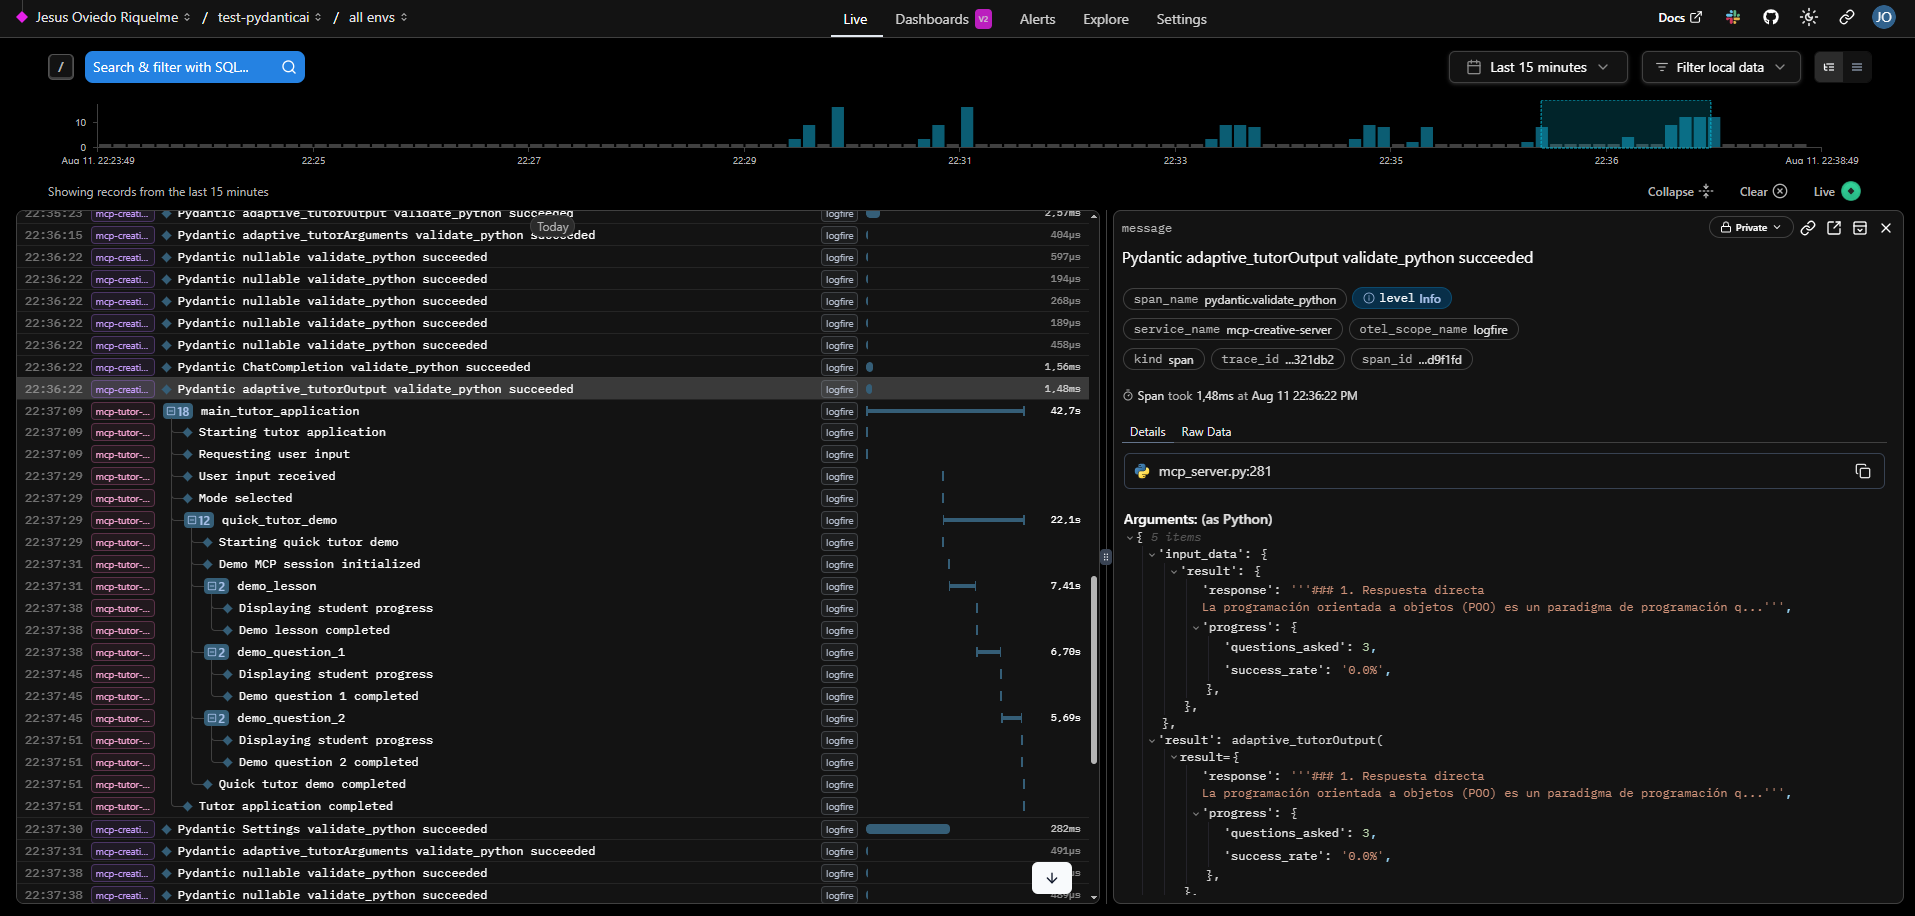